In [2]:
import numpy as np
import seaborn as sb
import numpy.random as nr
import matplotlib.pyplot as pl

%matplotlib inline

pl.rcParams['figure.figsize'] = (12.0, 10.0)




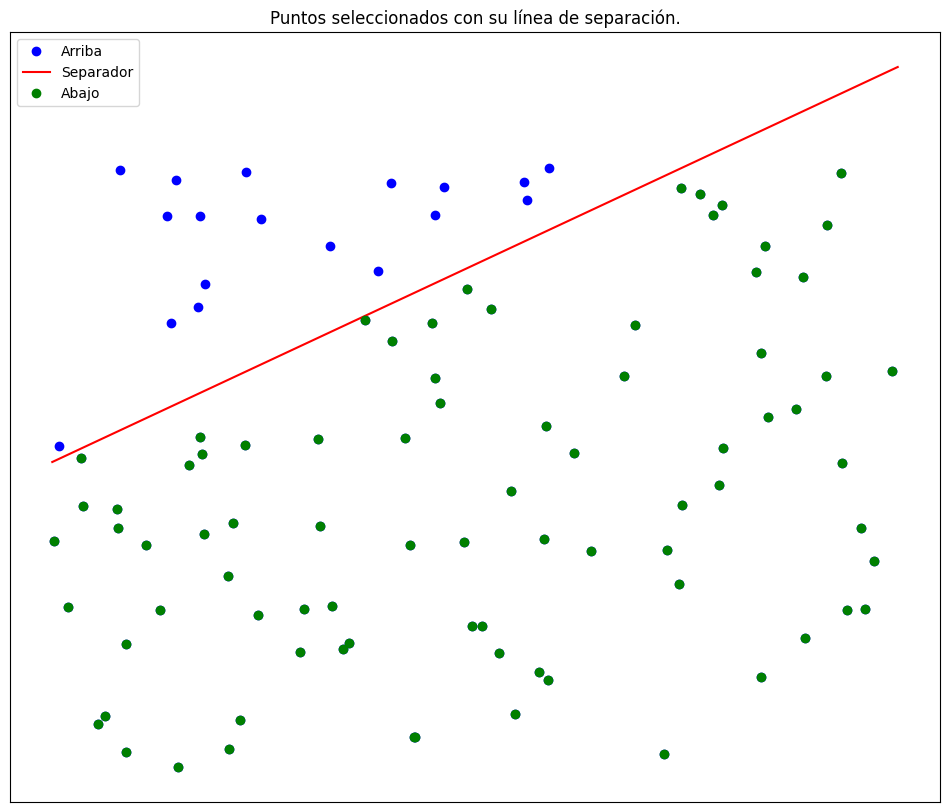

In [5]:
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1);

a = nr.rand();
b = nr.rand();
f = lambda x : a*x + b;

fig =pl.figure()
figa = pl.gca();

pl.plot(xn[:,0],xn[:,1],'bo');
pl.plot(x,f(x),'r')


yn = np.zeros([N,1]);

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        yn[i] = 1;
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        yn[i] = -1;
        
        
pl.legend(['Arriba','Separador','Abajo'],loc=0)
pl.title('Puntos seleccionados con su línea de separación.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

In [8]:
def perceptron(xn, xy, MaxIter = 1000, w = np.zeros(3)):
    N = xn.shape[0]

    f = lambda x: np.sign(w[0] + w[1] * x[0] + w[2] * x[1])

    for _ in range(MaxIter):
        i = nr.randint(N)
        if(yn[i] != f(xn[i,:])):
            w[0] = w[0] + yn[i]
            w[1] = w[1] + yn[i] * xn[i,0]
            w[2] = w[2] + yn[i] * xn[i,1]

    return w;

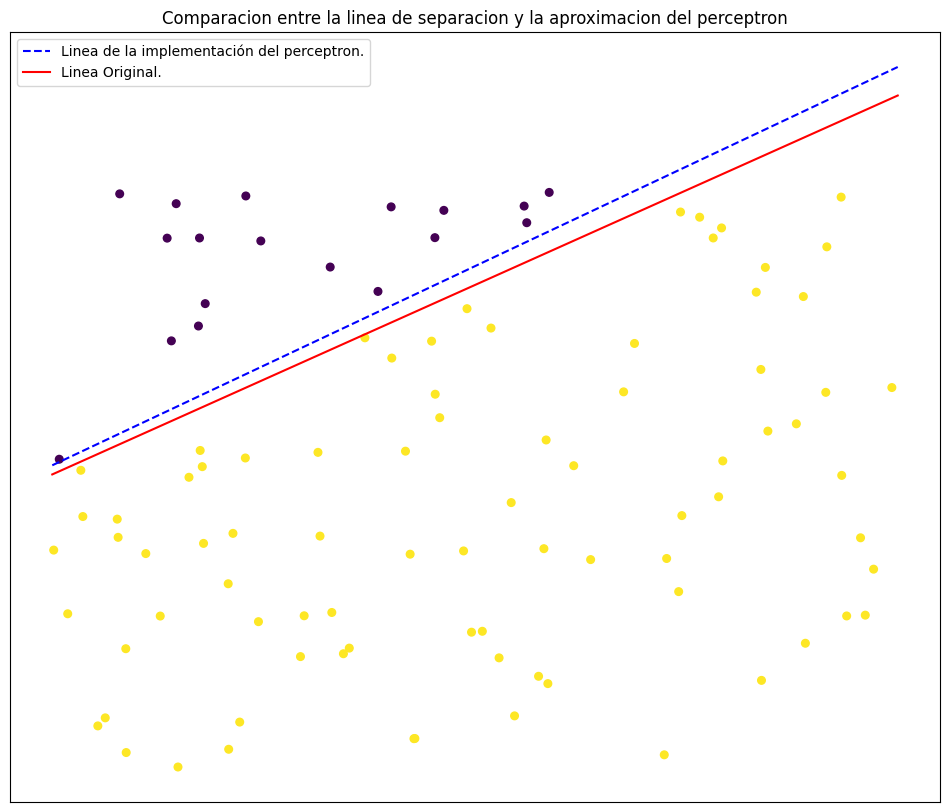

In [9]:
w= perceptron(xn,yn)

bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Linea de la implementación del perceptron.')
pl.plot(x,f(x),'r',label='Linea Original.')
pl.legend()

pl.title('Comparacion entre la linea de separacion y la aproximacion del perceptron')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


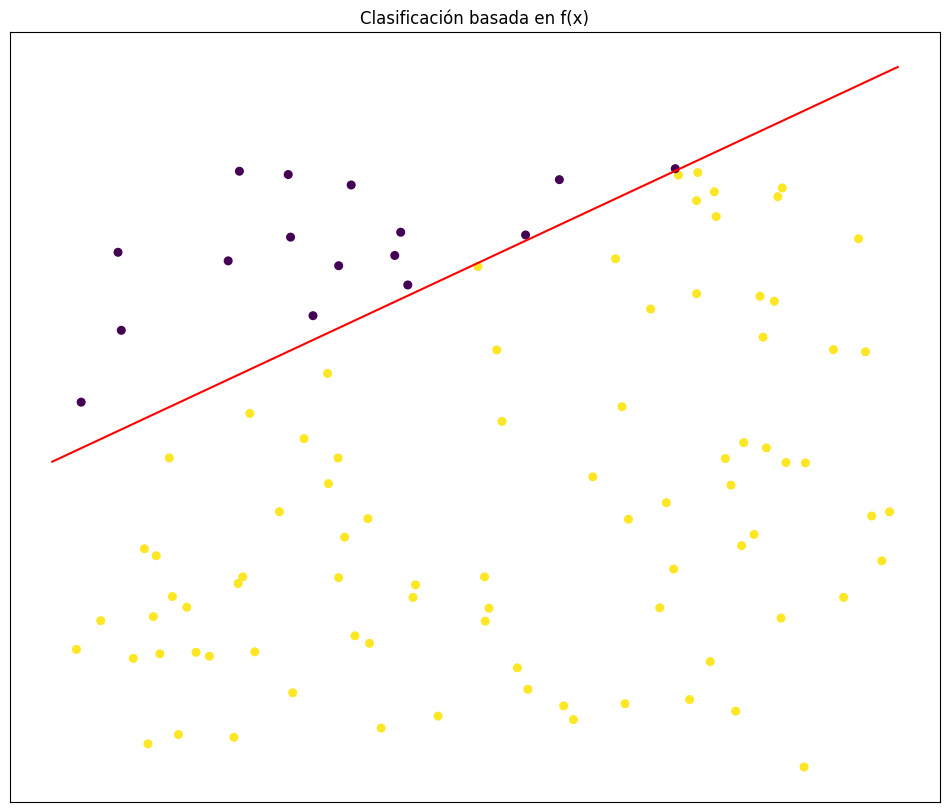

In [11]:


x = np.linspace(0,1);

N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca();

pl.plot(x,f(x),'r')

yn = np.sign(f(xn[:,0])-xn[:,1])

colors = (yn+1)/2.0;

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Clasificación basada en f(x)')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

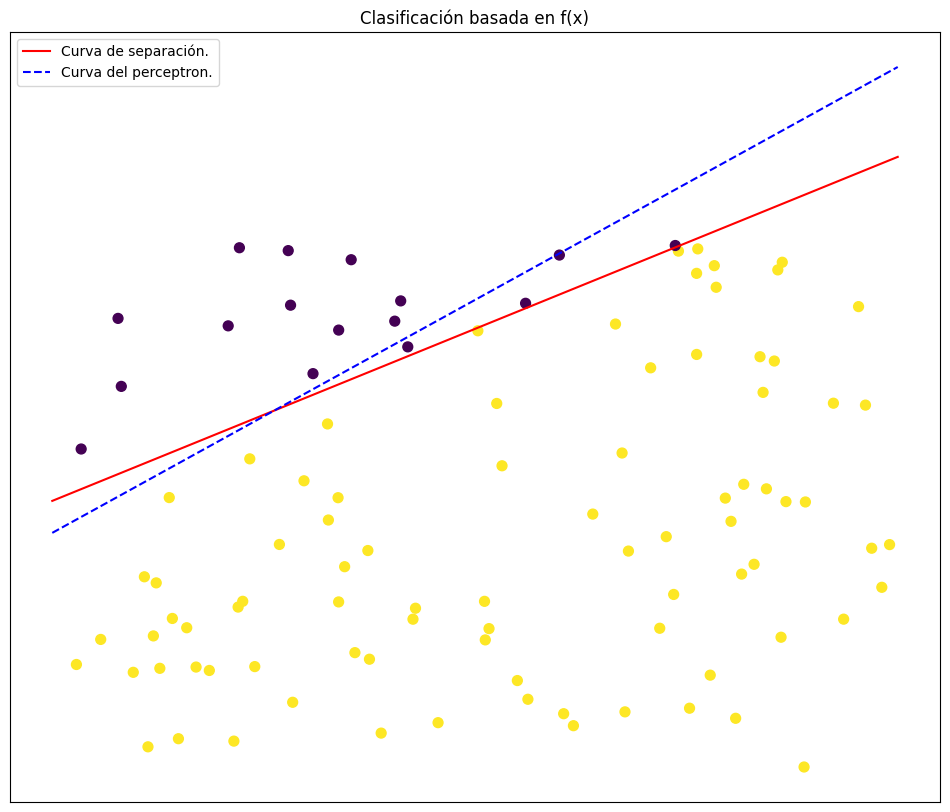

In [12]:


w = perceptron(xn,yn,MaxIter=1000)


bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

figa = pl.gca()
pl.scatter(xn[:,0],xn[:,1],c=colors,s=50);
pl.title('Clasificación basada en f(x)')

pl.plot(x,f(x),'r',label='Curva de separación.')
pl.plot(x,y(x),'b--',label = 'Curva del perceptron.')

pl.legend()

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)